# College Scorecard EDA 
## Part Six - Earning Potentials and Percentage of First Generation Students 
Looking at the relationship between the percentage of first generation students and the earning potentials after graduation.
There seems to be a negative correlationship between the two. Graduates from colleges that admit higher percentage of first generation studentstend to have lower earning potential.In other words, first genreation studdents may be graduating with lessor earning potential.


## Import Relevant Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    
import altair as alt               # We will use Altair for data visualization in additon to Pandas and Matplotlib

## Load the Data into Pandas Dataframe

In [51]:
COLUMNS_OF_INTEREST = ['UNITID', 'INSTNM', 'CITY', 'STABBR',"REGION", "MD_EARN_WNE_P6","PAR_ED_PCT_1STGEN"]

FOLDER_NAME = "./data/CollegeScorecard_Raw_Data/"
df = pd.read_csv(FOLDER_NAME + "Most-Recent-Cohorts-All-Data-Elements.csv", usecols = COLUMNS_OF_INTEREST)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 7 columns):
UNITID               7112 non-null int64
INSTNM               7112 non-null object
CITY                 7112 non-null object
STABBR               7112 non-null object
REGION               7112 non-null int64
PAR_ED_PCT_1STGEN    6741 non-null object
MD_EARN_WNE_P6       5887 non-null object
dtypes: int64(2), object(5)
memory usage: 389.0+ KB


In [52]:
df.sample(10)

,UNITID,INSTNM,CITY,STABBR,REGION,PAR_ED_PCT_1STGEN,MD_EARN_WNE_P6
4569,418533,Lancaster County Career and Technology Center,Willow Street,PA,2,0.5153508772,30900
5567,456791,Brown Mackie College-Greenville,Greenville,SC,5,0.4887650235,25800
5695,459037,Empire Beauty School-E Greensboro,Greensboro,NC,5,0.5552589429,15900
1244,155061,Fort Hays State University,Hays,KS,4,0.385026738,34000
4437,407470,Empire Beauty School-Cincinnati,Cincinnati,OH,3,0.6473214286,19600
4303,381325,CET-Santa Maria,Santa Maria,CA,8,0.6925388082,19500
1394,160065,University of Holy Cross,New Orleans,LA,5,0.4898876404,36500
6456,487232,Texas College of Cosmetology-Lubbock,Lubbock,TX,6,0.4568527919,NaN
1345,157757,Spalding University,Louisville,KY,5,0.3500837521,35400
3262,218955,Williamsburg Technical College,Kingstree,SC,5,0.5408560311,16600


In [59]:
df = df[(df['PAR_ED_PCT_1STGEN'] != "PrivacySuppressed") & (df['MD_EARN_WNE_P6'] != "PrivacySuppressed")] 

df = df[(df['PAR_ED_PCT_1STGEN'].astype(float) > 0) & (df['MD_EARN_WNE_P6'].astype(float) > 0)]

df['PAR_ED_PCT_1STGEN'] = df['PAR_ED_PCT_1STGEN'].astype(float)
df['MD_EARN_WNE_P6'] = df['MD_EARN_WNE_P6'].astype(float)


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5097 entries, 0 to 7098
Data columns (total 7 columns):
UNITID               5097 non-null int64
INSTNM               5097 non-null object
CITY                 5097 non-null object
STABBR               5097 non-null object
REGION               5097 non-null int64
PAR_ED_PCT_1STGEN    5097 non-null float64
MD_EARN_WNE_P6       5097 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 318.6+ KB


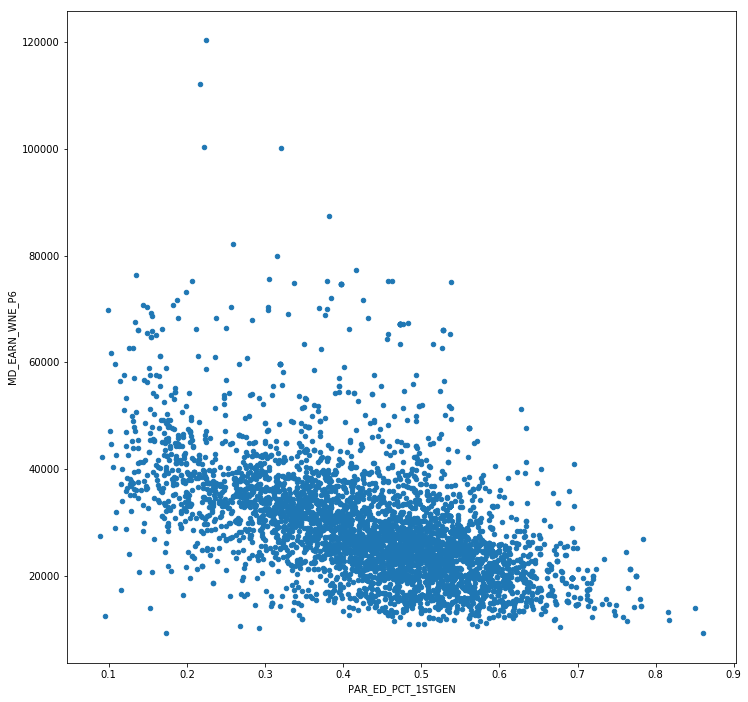

In [61]:
fig, ax = plt.subplots(figsize=(12,12))

df.plot.scatter(
    x='PAR_ED_PCT_1STGEN',
    y='MD_EARN_WNE_P6',
    ax=ax
)

In [98]:
grouped = df[["PAR_ED_PCT_1STGEN", "MD_EARN_WNE_P6", "REGION", "STABBR"]].groupby("STABBR").mean().reset_index()
grouped["MD_EARN_WNE_P6"] = (grouped["MD_EARN_WNE_P6"] / 1000).round(0)
grouped["PAR_ED_PCT_1STGEN"] = grouped["PAR_ED_PCT_1STGEN"].round(2)

grouped.sample(10)

,STABBR,PAR_ED_PCT_1STGEN,MD_EARN_WNE_P6,REGION
47,TN,0.48,25.0,5
13,GU,0.51,21.0,9
41,OR,0.43,28.0,8
50,VA,0.43,29.0,5
10,FL,0.48,26.0,5
25,MI,0.43,27.0,3
27,MO,0.43,30.0,4
11,FM,0.47,16.0,9
43,PR,0.46,15.0,9
8,DC,0.43,34.0,2


In [99]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
STABBR               57 non-null object
PAR_ED_PCT_1STGEN    57 non-null float64
MD_EARN_WNE_P6       57 non-null float64
REGION               57 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.9+ KB


## The Region Mapping

-    0: "U.S. Service Schools",
-    1: "New England (CT, ME, MA, NH, RI, VT)",
-    2: "Mid East (DE, DC, MD, NJ, NY, PA)",
-    3: "Great Lakes (IL, IN, MI, OH, WI)",
-    4: "Plains (IA, KS, MN, MO, NE, ND, SD)",
-    5: "Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)",
-    6: "Southwest (AZ, NM, OK, TX)",
-    7: "Rocky Mountains (CO, ID, MT, UT, WY)",
-    8: "Far West (AK, CA, HI, NV, OR, WA)",
-    9: "Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)"


In [100]:
REGION_DICT = {
    0: "U.S. Service Schools",
    1: "New England",
    2: "Mid East",
    3: "Great Lakes",
    4: "Plains",
    5: "Southeast",
    6: "Southwest",
    7: "Rocky Mountains",
    8: "Far West",
    9: "Outlying Areas"
}

grouped["REGION"].replace(to_replace=REGION_DICT, inplace=True)

grouped.sample(10)

,STABBR,PAR_ED_PCT_1STGEN,MD_EARN_WNE_P6,REGION
20,KY,0.49,24.0,Southeast
38,NY,0.41,33.0,Mid East
43,PR,0.46,15.0,Outlying Areas
35,NJ,0.51,29.0,Mid East
8,DC,0.43,34.0,Mid East
16,ID,0.45,25.0,Rocky Mountains
19,KS,0.41,30.0,Plains
11,FM,0.47,16.0,Outlying Areas
7,CT,0.46,34.0,New England
23,MD,0.45,30.0,Mid East


In [108]:
scatter = alt.Chart(grouped).mark_circle(size=900).encode(
    x=alt.X('PAR_ED_PCT_1STGEN:Q', scale=alt.Scale(zero=False), axis=alt.Axis(format='%', title='% of First Generation College Students')),
    y=alt.Y('MD_EARN_WNE_P6:Q', scale=alt.Scale(zero=False), axis=alt.Axis(format='$', title='Earnings Six Years After Graduation ($1000)')),
    color='REGION',
    tooltip=['STABBR', 'PAR_ED_PCT_1STGEN', 'MD_EARN_WNE_P6']
)

scatter = scatter.properties(
    width=800,
    height=800
)

text = scatter.mark_text(
    align='center',
    baseline='middle',
).encode(
    text='STABBR:N',
    color=alt.value('white')
)

#scatter = scatter.interactive()

scatter + text


alt.LayerChart(...)